In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as spi
plt.style.use('seaborn-white')
import util
# from util import plot_diff_lambdas_distances
%matplotlib inline

In [20]:
# filename = 'data/diff_lambdas_redshifts3.csv'
# filename = 'data/diff_lambdas_const_rh7.csv'
filename = 'data/half_analytical_const_m.csv'
# filename = 'data/half_analytical_const_m_kant.csv'
# filename = 'data/half_analytical.csv'
# filename = 'data/half_analytical_throwaway.csv'
# filename = 'data/diff_lambdas_redshifts3.csv'
df = pd.read_csv(filename)

In [21]:
df[df.om_lambdas==0].count()
df.om_lambdas.nunique()
# df = df.head(2500)

50

In [22]:
# zs = np.linspace(0.2, 1, 50)
# z_lens = []
# for z in zs:
#     z_lens.extend([z]*50)

# df['z_lens'] = z_lens
# df['comoving_lens'] = df.DL*(1+df.z_lens)
# df['raw_rs'] = df.rs - df.comoving_lens
# df['M'] = 1474e12 / 3.086e22
# df.to_csv('data/diff_lambdas_bigger_redshifts2.csv', index=False)

In [23]:
length_scale = 3.086e22
H_0 = 7.56e-27 * length_scale

def omega_lambda2lambda(Omega_Lambda):
    return 3*Omega_Lambda*H_0**2

def kantowski_alpha(R, M, phi, Omega_Lambda):
    r0 = 1/(1/R + M/R**2)
    Lambda = omega_lambda2lambda(Omega_Lambda)
    rs = 2*M
    first_term = (rs/2/r0)*np.cos(phi)*(-4*(np.cos(phi))**2 - 12*np.cos(phi)*np.sin(phi)*np.sqrt(Lambda*r0**2/3+rs/r0*(np.sin(phi))**3) + Lambda*r0**2*(8/3-20/3*(np.sin(phi))**2))
    second_term = (rs/2/r0)**2*(15/4*(2*phi-np.pi) + np.cos(phi)*(4+33/2*np.sin(phi)-4*(np.sin(phi))**2+19*(np.sin(phi))**3-64*(np.sin(phi))**5) - 12*np.log(np.tan(phi/2))*(np.sin(phi))**3)
    return first_term + second_term

preds_frw = []
preds_ishak = []
preds_kantowski = []
for index, row in df.iterrows():
    M = row.M
    Lambda = 3*row.om_lambdas*H_0**2
    rho = (1-row.om_lambdas)*3*H_0**2/(8*np.pi)
    rh = (3*M/(4*np.pi*rho))**(1./3)
    A_frw = 4*M/(row.DL*row.theta) + 15*np.pi*M**2/4/(row.DL*row.theta)**2 + 401/12*M**3/(row.DL*row.theta)**3
    frw = row.comoving_lens/(A_frw/row.theta -1)
    
    A_ishak = 4*M/(row.DL*row.theta) + 15*np.pi*M**2/4/(row.DL*row.theta)**2 + 305/12*M**3/(row.DL*row.theta)**3 - Lambda*row.DL*row.theta*row.exit_rhs/3
    ishak = row.comoving_lens/(A_ishak/row.theta -1)
    
#     A_kantowski = -kantowski_alpha(row.DL*row.theta, row.M, row.enter_phis, row.om_lambdas)
#     kantowski = row.comoving_lens/(A_kantowski/row.theta-1)
    kantowski = 90
    
    preds_frw.append(frw)
    preds_ishak.append(ishak)
    preds_kantowski.append(kantowski)

df['preds_frw'] = preds_frw
df['preds_ishak'] = preds_ishak
df['preds_kantowski'] = preds_kantowski

df['numerical'] = df.raw_rs/df.preds_frw
df['ishak'] = df.preds_ishak/df.preds_frw
df['kantowski'] = df.preds_kantowski/df.preds_frw
# df['numerical first order'] = df.preds_frw / df.preds_first_order

In [24]:
df.head()

,DL,M,comoving_lens,exit_rhs,numerical_thetas,om_lambdas,raw_rs,rs,step,theta,z_lens,preds_frw,preds_ishak,preds_kantowski,numerical,ishak,kantowski
0,1048.733594,4.776410e-08,1573.100391,0.804434,8.000000e-07,0.000000,5.544923,1578.645314,1.000000e-09,8.000000e-07,0.5,5.544921,5.544921,90,1.000000,1.0,16.231071
1,1053.109420,4.776410e-08,1579.664129,0.809926,8.000000e-07,0.020204,5.591372,1585.255502,1.000000e-09,8.000000e-07,0.5,5.591376,5.591376,90,0.999999,1.0,16.096218
2,1057.554224,4.776410e-08,1586.331336,0.815570,8.000000e-07,0.040408,5.638770,1591.970107,1.000000e-09,8.000000e-07,0.5,5.638762,5.638762,90,1.000001,1.0,15.960951
3,1062.070015,4.776410e-08,1593.105022,0.821376,8.000000e-07,0.060612,5.687112,1598.792135,1.000000e-09,8.000000e-07,0.5,5.687110,5.687111,90,1.000000,1.0,15.825260
4,1066.658886,4.776410e-08,1599.988329,0.827350,8.000000e-07,0.080816,5.736450,1605.724779,1.000000e-09,8.000000e-07,0.5,5.736454,5.736454,90,0.999999,1.0,15.689136


In [25]:
df.head(1)[['kantowski', 'numerical', 'ishak']].values

array([[ 16.23107074,   1.00000035,   1.00000001]])

df[(df.om_lambdas > 0.96) & (df.om_lambdas < 0.97)].numerical.values
df[(df.om_lambdas == 0.99)][['numerical', 'z_lens']].values

In [26]:
stats = df[['om_lambdas', 'numerical', 'ishak', 'kantowski']].groupby('om_lambdas').agg(['mean', 'std', 'count'])
stats.columns = [' '.join(col).strip() for col in stats.columns.values]
stats['numerical mean std'] = stats['numerical std']/np.sqrt(stats['numerical count'])
# stats['numerical first order mean std'] = stats['numerical first order std']/np.sqrt(stats['numerical first order count'])
stats['ishak mean std'] = stats['ishak std']/np.sqrt(stats['ishak count'])
stats.head()

,numerical mean,numerical std,numerical count,ishak mean,ishak std,ishak count,kantowski mean,kantowski std,kantowski count,numerical mean std,ishak mean std
om_lambdas,,,,,,,,,,,
0.000000,1.0,0.000002,50,1.0,5.604889e-10,50,11.239245,2.207744,50,2.187320e-07,7.926510e-11
0.020204,1.0,0.000002,50,1.0,4.811325e-10,50,11.128922,2.196419,50,2.438386e-07,6.804242e-11
0.040408,1.0,0.000002,50,1.0,4.035914e-10,50,11.018233,2.185070,50,2.479901e-07,5.707644e-11
0.060612,1.0,0.000002,50,1.0,3.365573e-10,50,10.907169,2.173697,50,2.193611e-07,4.759638e-11
0.080816,1.0,0.000002,50,1.0,2.978032e-10,50,10.795719,2.162299,50,2.247669e-07,4.211573e-11


In [27]:
stats['numerical mean'] = stats['numerical mean'] - 1
stats['ishak mean'] = stats['ishak mean'] - 1
stats['kantowski mean'] = stats['kantowski mean'] - 1
# stats['numerical first order mean'] = stats['numerical first order mean'] - 1

In [28]:
# stats['numerical mean'].values[48]
# stats.iloc[49, 0] = stats['numerical mean'].values[48]

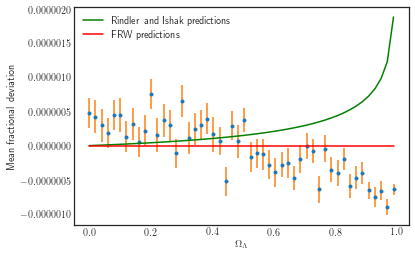

In [29]:
scale = 1

# from matplotlib import rc
# rc('text', usetex=True)

# stats = stats.head(49)
plt.plot(stats.index, stats['numerical mean']/scale, '.', label='__nolegend__')
# plt.plot(stats.index, stats['numerical first order mean']/scale, 'b-', label='with second order corrections')
plt.errorbar(stats.index, stats['numerical mean']/scale, yerr=stats['numerical mean std']/scale, linestyle='none', label='__nolegend__')
plt.xlabel('Omega_Lambda')
plt.ylabel('Mean fractional deviation/10^-6')
plt.plot(stats.index, stats['ishak mean']/scale, 'g-', label='Rindler and Ishak predictions')
# plt.plot(stats.index, stats['kantowski mean']/scale, 'b-', label="Kantowski predictions")
plt.plot(stats.index, [0/scale]*len(stats.index), 'r-', label='FRW predictions')
# plt.ylim((-0.0008, 0.0008))
plt.legend()

# plt.xlabel(r'$\Omega_{\Lambda}$')
# # plt.ylabel(r'Mean fractional deviation / $10^{-6}$')
# plt.ylabel(r'Mean fractional deviation')
# plt.savefig('images/half_analytical_const_m.png',  dpi=400, transparent=True)

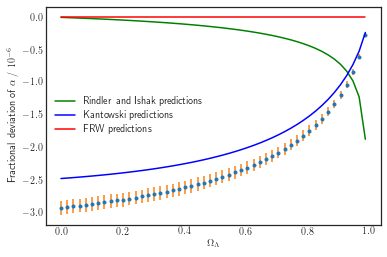

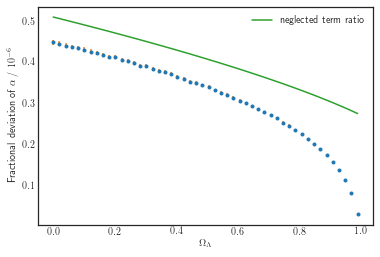

In [119]:
import util
import importlib
importlib.reload(util)
from util import plot_alphas
plot_alphas('data/half_analytical_const_m_kant.csv', plot_ishak=True, plot_kantowski=True, latex=True)

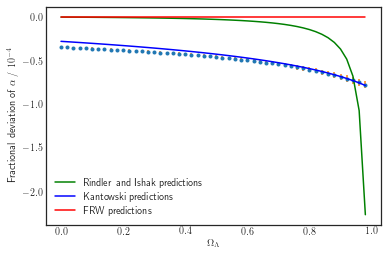

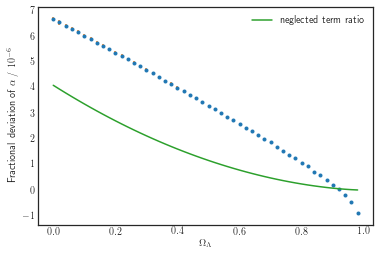

In [117]:
import util
import importlib
importlib.reload(util)
from util import plot_alphas
fn = ['images/const_rh.png', 'images/const_rh_neglected.png']
plot_alphas('data/half_analytical_kant.csv', plot_ishak=True, plot_kantowski=True, latex=True, filenames=fn)

D:\GIT\msciproject\util.py:21: RuntimeWarning: invalid value encountered in log
  second_term = (rs/2/r0)**2*(15/4*(2*phi-np.pi) + np.cos(phi)*(4+33/2*np.sin(phi)-4*(np.sin(phi))**2+19*(np.sin(phi))**3-64*(np.sin(phi))**5) - 12*np.log(np.tan(phi/2))*(np.sin(phi))**3)


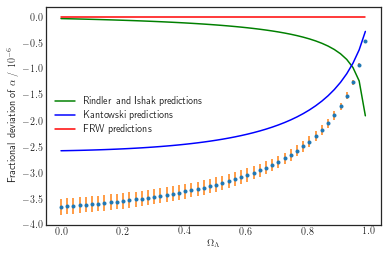

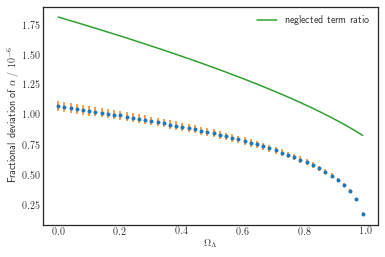

In [113]:
import util
import importlib
importlib.reload(util)
from util import plot_alphas
filenames = ['images/const_lensz.png', 'images/const_lensz_neglected.png']
plot_alphas('data/half_analytical_const_lensz.csv', plot_ishak=True, plot_kantowski=True, latex=True, filenames=filenames)

D:\GIT\msciproject\util.py:21: RuntimeWarning: invalid value encountered in log
  second_term = (rs/2/r0)**2*(15/4*(2*phi-np.pi) + np.cos(phi)*(4+33/2*np.sin(phi)-4*(np.sin(phi))**2+19*(np.sin(phi))**3-64*(np.sin(phi))**5) - 12*np.log(np.tan(phi/2))*(np.sin(phi))**3)


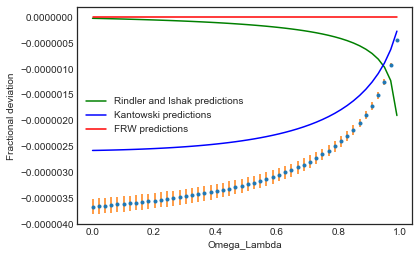

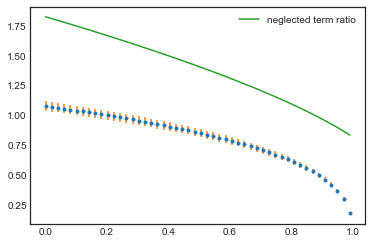

In [100]:
import importlib
importlib.reload(util)
from util import plot_alphas
plot_alphas('data/half_analytical_const_lensz.csv', plot_ishak=True, plot_kantowski=True)

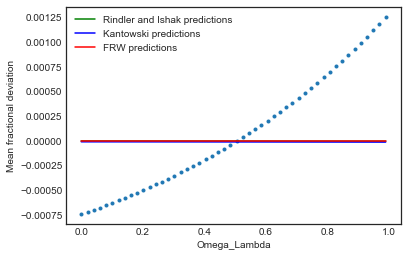

In [127]:
import importlib
importlib.reload(util)
from util import plot_rs
plot_rs('data/curved2.csv', plot_ishak=True, plot_kantowski=True)

1.34103835405e-13


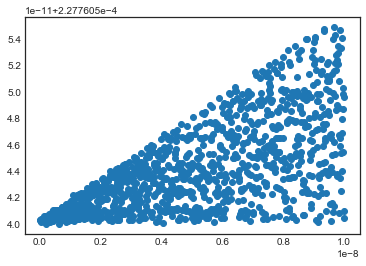

In [97]:
df_steps = pd.read_csv('data/half_analytical_steps.csv')
plt.plot(df_steps.step, df_steps.alphas, 'o')
print(df_steps.head(20).alphas.std())

---

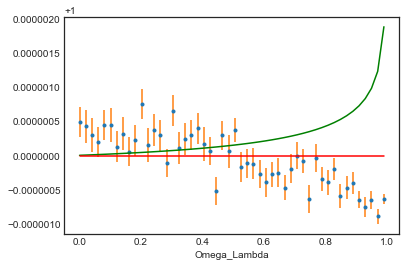

In [50]:
plot_diff_lambdas_distances('data/half_analytical_const_m.csv', plot_ishak=True)

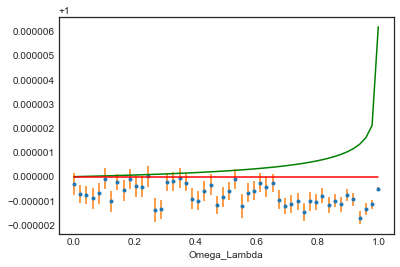

In [51]:
plot_diff_lambdas_distances('data/half_analytical_const_m2.csv', plot_ishak=True)

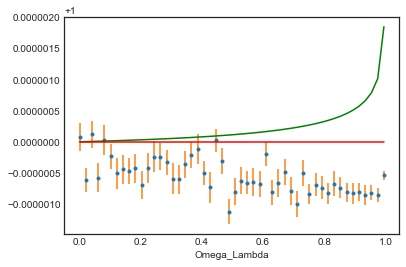

In [3]:
plot_diff_lambdas_distances('data/half_analytical_const_m3.csv', plot_ishak=True)

In [ ]:
plot_diff_lambdas_distances('data/half_analytical_const_lensz.csv', plot_ishak=True)

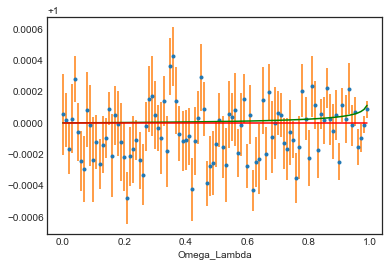

In [7]:
import util
import importlib
importlib.reload(util)
from util import plot_diff_lambdas_distances
plot_diff_lambdas_distances('data/diff_lambdas_redshifts3.csv')

In [ ]:
plot_diff_lambdas_distances('data/diff_lambdas_const_rh5.csv')

In [ ]:
plot_diff_lambdas_distances('data/diff_lambdas_const_rh6.csv') # higher mass

In [ ]:
plot_diff_lambdas_distances('data/diff_lambdas_const_rh7.csv') # lower mass

In [ ]:
# stats2 = df[['om_lambdas', 'raw_rs', 'preds_frw', 'preds_ishak']].groupby('om_lambdas').agg(['mean', 'std', 'count'])
# stats2.columns = [' '.join(col).strip() for col in stats2.columns.values]
# stats2['raw_rs mean std'] = stats2['raw_rs std']/np.sqrt(stats2['raw_rs count'])
# stats2

In [ ]:
# scale = stats2['preds_frw mean']
# # scale = 1
# plt.plot(stats2.index, stats2['raw_rs mean']/scale, '.')
# plt.errorbar(stats2.index, stats2['raw_rs mean']/scale, yerr=stats2['raw_rs mean std']/scale, linestyle='none')
# plt.xlabel('Omega_Lambda')
# # plt.ylabel('Mean fractional deviation/10^-5')
# plt.plot(stats2.index, stats2['preds_frw mean']/scale, 'r-')
# plt.plot(stats2.index, stats2['preds_ishak mean']/scale, 'g-')

In [ ]:
# chisquared_frw = (stats2['raw_rs mean'] - stats2['preds_frw mean'])**2/(stats2['raw_rs mean std'])**2
# chisquared_ishak = (stats2['raw_rs mean'] - stats2['preds_ishak mean'])**2/(stats2['raw_rs mean std'])**2
# p_frw = np.exp(-chisquared_frw.sum()/2)
# p_ishak = np.exp(-chisquared_ishak.sum()/2)
# print(p_frw/p_ishak)
# print(chisquared_frw)
# print(chisquared_ishak)